In [2]:
#importing packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.animation as animation
from scipy.misc import derivative
import numpy as np
import astropy.units as u
from astropy.table import Table
from astropy import constants as const
import pandas as pd
import sympy as sp
import decimal
import seaborn as sns
decimal.getcontext().prec = 100
import scipy as sci
from scipy import integrate

In [3]:
phi0 = np.pi / 4 * u.rad

In [4]:
def Shot(ma, P0, F, L, waveLength):
    r = 1 - np.pi / F
    Sshot = 1/(4 * L)
    Sshot *= np.sqrt(2 * const.hbar.cgs * waveLength * const.c.cgs / (np.pi * P0))
    Sshot *= np.sin(phi0) / np.sin(2 * phi0)
    Sshot *= np.sqrt(1 + r**2 - 2 * r * np.cos(((2 * L * ma/(const.hbar * const.c)).decompose()).value))
    return (Sshot**2).cgs

In [5]:
Shot(1 * u.eV, 1 * u.kiloWatt, 1e2, 40 * u.m, 1064 * u.nm)

<Quantity 1.62087809e-39 s>

In [6]:
def Rad(ma, P0, F, L, waveLength, M):
    P = 2/np.pi * P0 * F
    r = 1 - np.pi / F
    Srad = 16 * F / (M * L * (ma/const.hbar.cgs)**2)
    Srad *= np.sqrt(const.hbar.cgs * P/(np.pi * waveLength * const.c.cgs))
    Srad *= ((L * ma/(const.hbar * const.c)).decompose()).value / np.sin(((L * ma/(const.hbar * const.c)).decompose()).value)
    Srad *= 1 - r**2
    Srad /= 2 * np.sqrt(1 + r**2 -2 * r * np.cos(((2 * L * ma/(const.hbar * const.c)).decompose()).value))
    return (Srad**2).cgs

In [7]:
def SQL(ma, P0, F, L, waveLength, M):
    return (Shot(ma, P0, F, L, waveLength) + Rad(ma, P0, F, L, waveLength, M))**(0.5)

In [8]:
SQL(1 * u.eV, 1 * u.kiloWatt, 1e2, 40 * u.m, 1064 * u.nm, 10 * u.kg)

<Quantity 4.02601303e-20 s(1/2)>

In [9]:
def g(ma, T, P0, F, L, waveLength, M):
    ma *= u.eV
    rhoDM = 0.3 * u.GeV / (u.cm)**3
    Q = 1e6
    omega = 2 * np.pi * (const.c.cgs / (waveLength).to('cm')).decompose()
    f = 1/((omega * SQL(ma, P0, F, L, waveLength, M) * (2 * np.pi * Q * T * const.hbar.cgs / (ma))**(-0.25)).cgs * 1/ np.sqrt(2 * rhoDM * const.hbar.cgs * const.c.cgs**3).cgs)
    return (1/f.to('GeV')).value

In [10]:
g(1e-9, 30 * u.day, 1 * u.kiloWatt, 1e2, 40 * u.m, 1064 * u.nm, 10 * u.kg)

7.710861376561998e-11

In [60]:
SN1987A = pd.read_csv('SN1987A.csv')
CAST = pd.read_csv('CAST.csv')
HBS = pd.read_csv('Horizontal_Branch_Star.csv')
ADMX = pd.read_csv('ADMX.csv')

In [54]:
b = SN1987A['Y'].to_numpy()
b

array([5.42867544e-12, 5.42867544e-12, 5.03547932e-12, 9.18893768e-12,
       1.94892855e-11, 2.26517647e-11, 3.29888630e-11, 6.01993548e-11,
       8.76712387e-11])

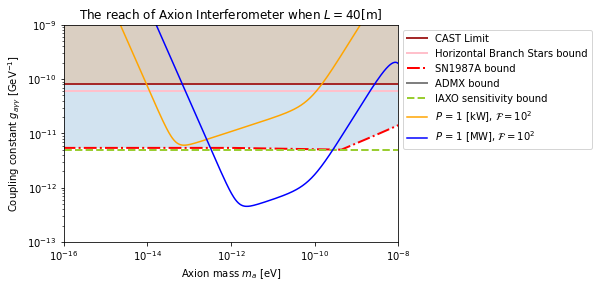

In [126]:
y = np.logspace(-17, -7.0, 500)
m = np.logspace(-17, -8.0, 500)
fig, ax = plt.subplots()

ax.plot(CAST[["X"]].to_numpy(), CAST[["Y"]].to_numpy(), label = r'CAST Limit', linewidth=2, color = 'brown')
ax.plot(HBS[["X"]].to_numpy(), HBS[["Y"]].to_numpy(), label = r'Horizontal Branch Stars bound', linewidth=2, color = 'pink')
ax.plot(SN1987A[["X"]].to_numpy(), SN1987A[["Y"]].to_numpy(), '-.', label = r'SN1987A bound', linewidth=2, color = 'red')
ax.plot(ADMX[["X"]].to_numpy(), ADMX[["Y"]].to_numpy(), label = r'ADMX bound', linewidth=2, color = 'grey')
for i in range(500):
    y[i] = 5e-12
ax.plot(m, y, '--', label = r'IAXO sensitivity bound', linewidth=2, color = 'yellowgreen')

for i in range(500):
    y[i] = g(m[i], 30 * u.day, 1e-2 * u.kiloWatt, 1e2, 40 * u.m, 1064 * u.nm, 10 * u.kg)
ax.plot(m, y, label = r'$P$ = 1 [kW], $\mathcal{F} = 10^2$', color = 'orange')
'''
for i in range(500):
    y[i] = g(m[i], 30 * u.day, 1e-2 * u.kiloWatt, 1e6, 40 * u.m, 1064 * u.nm, 10 * u.kg)
plt.plot(m, y, label = r'$P$ = 1 [kW], $\mathcal{F} = 10^6$')
'''
for i in range(500):
    y[i] = g(m[i], 30 * u.day, 1e1 * u.kiloWatt, 1e2, 40 * u.m, 1064 * u.nm, 10 * u.kg)
ax.plot(m, y, label = r'$P$ = 1 [MW], $\mathcal{F} = 10^2$', color = 'blue')
'''
for i in range(500):
    y[i] = g(m[i], 30 * u.day, 1e1 * u.kiloWatt, 1e6, 40 * u.m, 1064 * u.nm, 10 * u.kg)
plt.plot(m, y, label = r'$P_0$ = 1 [MW], $\mathcal{F} = 10^6$')

for i in range(500):
    y[i] = 5.3e-12
ax.plot(m, y, '-.', label = r'SN1987A bound', linewidth=2)
'''

plt.fill_between(SN1987A["X"], SN1987A["Y"], 1e-8,  alpha=0.2)
plt.fill_between(CAST["X"], CAST["Y"], 1e-8,  alpha=0.2)
plt.fill_between(ADMX["X"], ADMX["Y"], 1e-8,  alpha=0.2)

#ax.axhspan(6e-11, 1e-9, color = "lightblue", alpha = 0.5)
#ax.annotate('CAST Limit', xy=(1e-12, 6e-11), xytext=(1e-12, 6e-11))
ax.set_title(r'The reach of Axion Interferometer when $L = 40$[m]')
ax.set_xlim(1e-16, 1e-8)
ax.set_ylim(1e-13, 1e-9)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Axion mass $m_a$ [eV]')
ax.set_ylabel(r'Coupling constant $g_{a\gamma\gamma}$ [GeV$^{-1}$]')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('deRoccoEtAl.png')


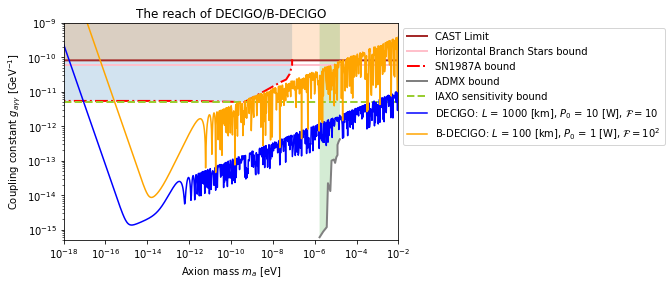

In [130]:
y = np.logspace(-17, -7, 800)
m = np.logspace(-18, -2, 800)
fig, ax = plt.subplots()
ax.plot(CAST[["X"]].to_numpy(), CAST[["Y"]].to_numpy(), label = r'CAST Limit', linewidth=2, color = 'brown')
ax.plot(HBS[["X"]].to_numpy(), HBS[["Y"]].to_numpy(), label = r'Horizontal Branch Stars bound', linewidth=2, color = 'pink')
ax.plot(SN1987A[["X"]].to_numpy(), SN1987A[["Y"]].to_numpy(), '-.', label = r'SN1987A bound', linewidth=2, color = 'red')
ax.plot(ADMX[["X"]].to_numpy(), ADMX[["Y"]].to_numpy(), label = r'ADMX bound', linewidth=2, color = 'grey')
for i in range(800):
    y[i] = 5e-12
ax.plot(m, y, '--', label = r'IAXO sensitivity bound', linewidth=2, color = 'yellowgreen')
for i in range(800):
    y[i] = g(m[i], 30 * u.day, 1e-2 * u.kiloWatt, 10, 1000 * u.km, 515 * u.nm, 1e2 * u.kg)
ax.plot(m, y, label = r'DECIGO: $L$ = 1000 [km], $P_0$ = 10 [W], $\mathcal{F} = 10$', color = 'blue')

for i in range(800):
    y[i] = g(m[i], 30 * u.day, 1e-3 * u.kiloWatt, 100, 100 * u.km, 515 * u.nm, 30 * u.kg)

plt.fill_between(SN1987A["X"], SN1987A["Y"], 1e-8,  alpha=0.2)
plt.fill_between(CAST["X"], CAST["Y"], 1e-8,  alpha=0.2)
plt.fill_between(ADMX["X"], ADMX["Y"], 1e-8,  alpha=0.2)
ax.plot(m, y, label = r'B-DECIGO: $L$ = 100 [km], $P_0$ = 1 [W], $\mathcal{F} = 10^2$', color = 'orange')
ax.set_title(r'The reach of DECIGO/B-DECIGO')
ax.set_ylim(5e-16, 1e-9)
ax.set_xlim(1e-18, 1e-2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Axion mass $m_a$ [eV]')
ax.set_ylabel(r'Coupling constant $g_{a\gamma\gamma}$ [GeV$^{-1}$]')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('decigoReach.png')